## 데이터 read & info 확인

In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 메모리
import gc

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 13
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터프레임을 넣고 column별 특성 및 결측값, 고유값들을 확인하는 함수 사용

def resumetable(df, n):
    print(f'데이터셋 크기: {df.shape}')                                # 데이터프레임의 전체 크기(행, 열) 출력

    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])         # 각 피처의 데이터 타입을 가져와 데이터프레임으로 생성
    summary = summary.reset_index()                                    # 인덱스를 초기화하여 컬럼으로 변환
    summary = summary.rename(columns={'index':'피처'})                 # 'index' 컬럼명을 '피처'로 변경

    summary['결측값 개수'] = df.isnull().sum().values                 # 각 피처의 결측값(null) 개수 계산
    summary['고유값 개수'] = df.nunique().values                      # 각 피처의 고유값 개수 계산
    
    for i in range(n):
        summary[f"{i+1}번째 값"] = df.iloc[i].values
    
    return summary                                                     # 요약 테이블 반환

In [3]:
# 불필요한 컬럼 drop 후 메인 데이터 읽어오기
df = pd.read_csv('02_데이터셋/청소년건강행태조사/kyrbs2024_sas/kyrbs2024_수정.csv')

In [4]:
with pd.option_context('display.max_rows', None):
    display(resumetable(df, 5))

데이터셋 크기: (54653, 57)


,피처,데이터 타입,결측값 개수,고유값 개수,1번째 값,2번째 값,3번째 값,4번째 값,5번째 값
0,OBS,object,0,54653,A100001,A100002,A100003,A100004,A100005
1,조사연도,float64,0,1,2024.0,2024.0,2024.0,2024.0,2024.0
2,시도,object,0,17,서울,서울,서울,서울,서울
3,도시규모,object,0,3,대도시,대도시,대도시,대도시,대도시
4,학교구분,object,0,2,중학교,중학교,중학교,중학교,중학교
5,학교유형,object,0,3,남녀공학,남녀공학,남녀공학,남녀공학,남녀공학
6,지역군,object,0,49,서울대4-3,서울대4-3,서울대4-3,서울대4-3,서울대4-3
7,주관적_건강_인지,float64,0,5,1.0,1.0,1.0,4.0,2.0
8,주관적_체형_인지,float64,0,5,2.0,4.0,3.0,4.0,4.0
9,평생_흡연_경험,float64,0,2,1.0,1.0,1.0,1.0,1.0


## 결측치 확인

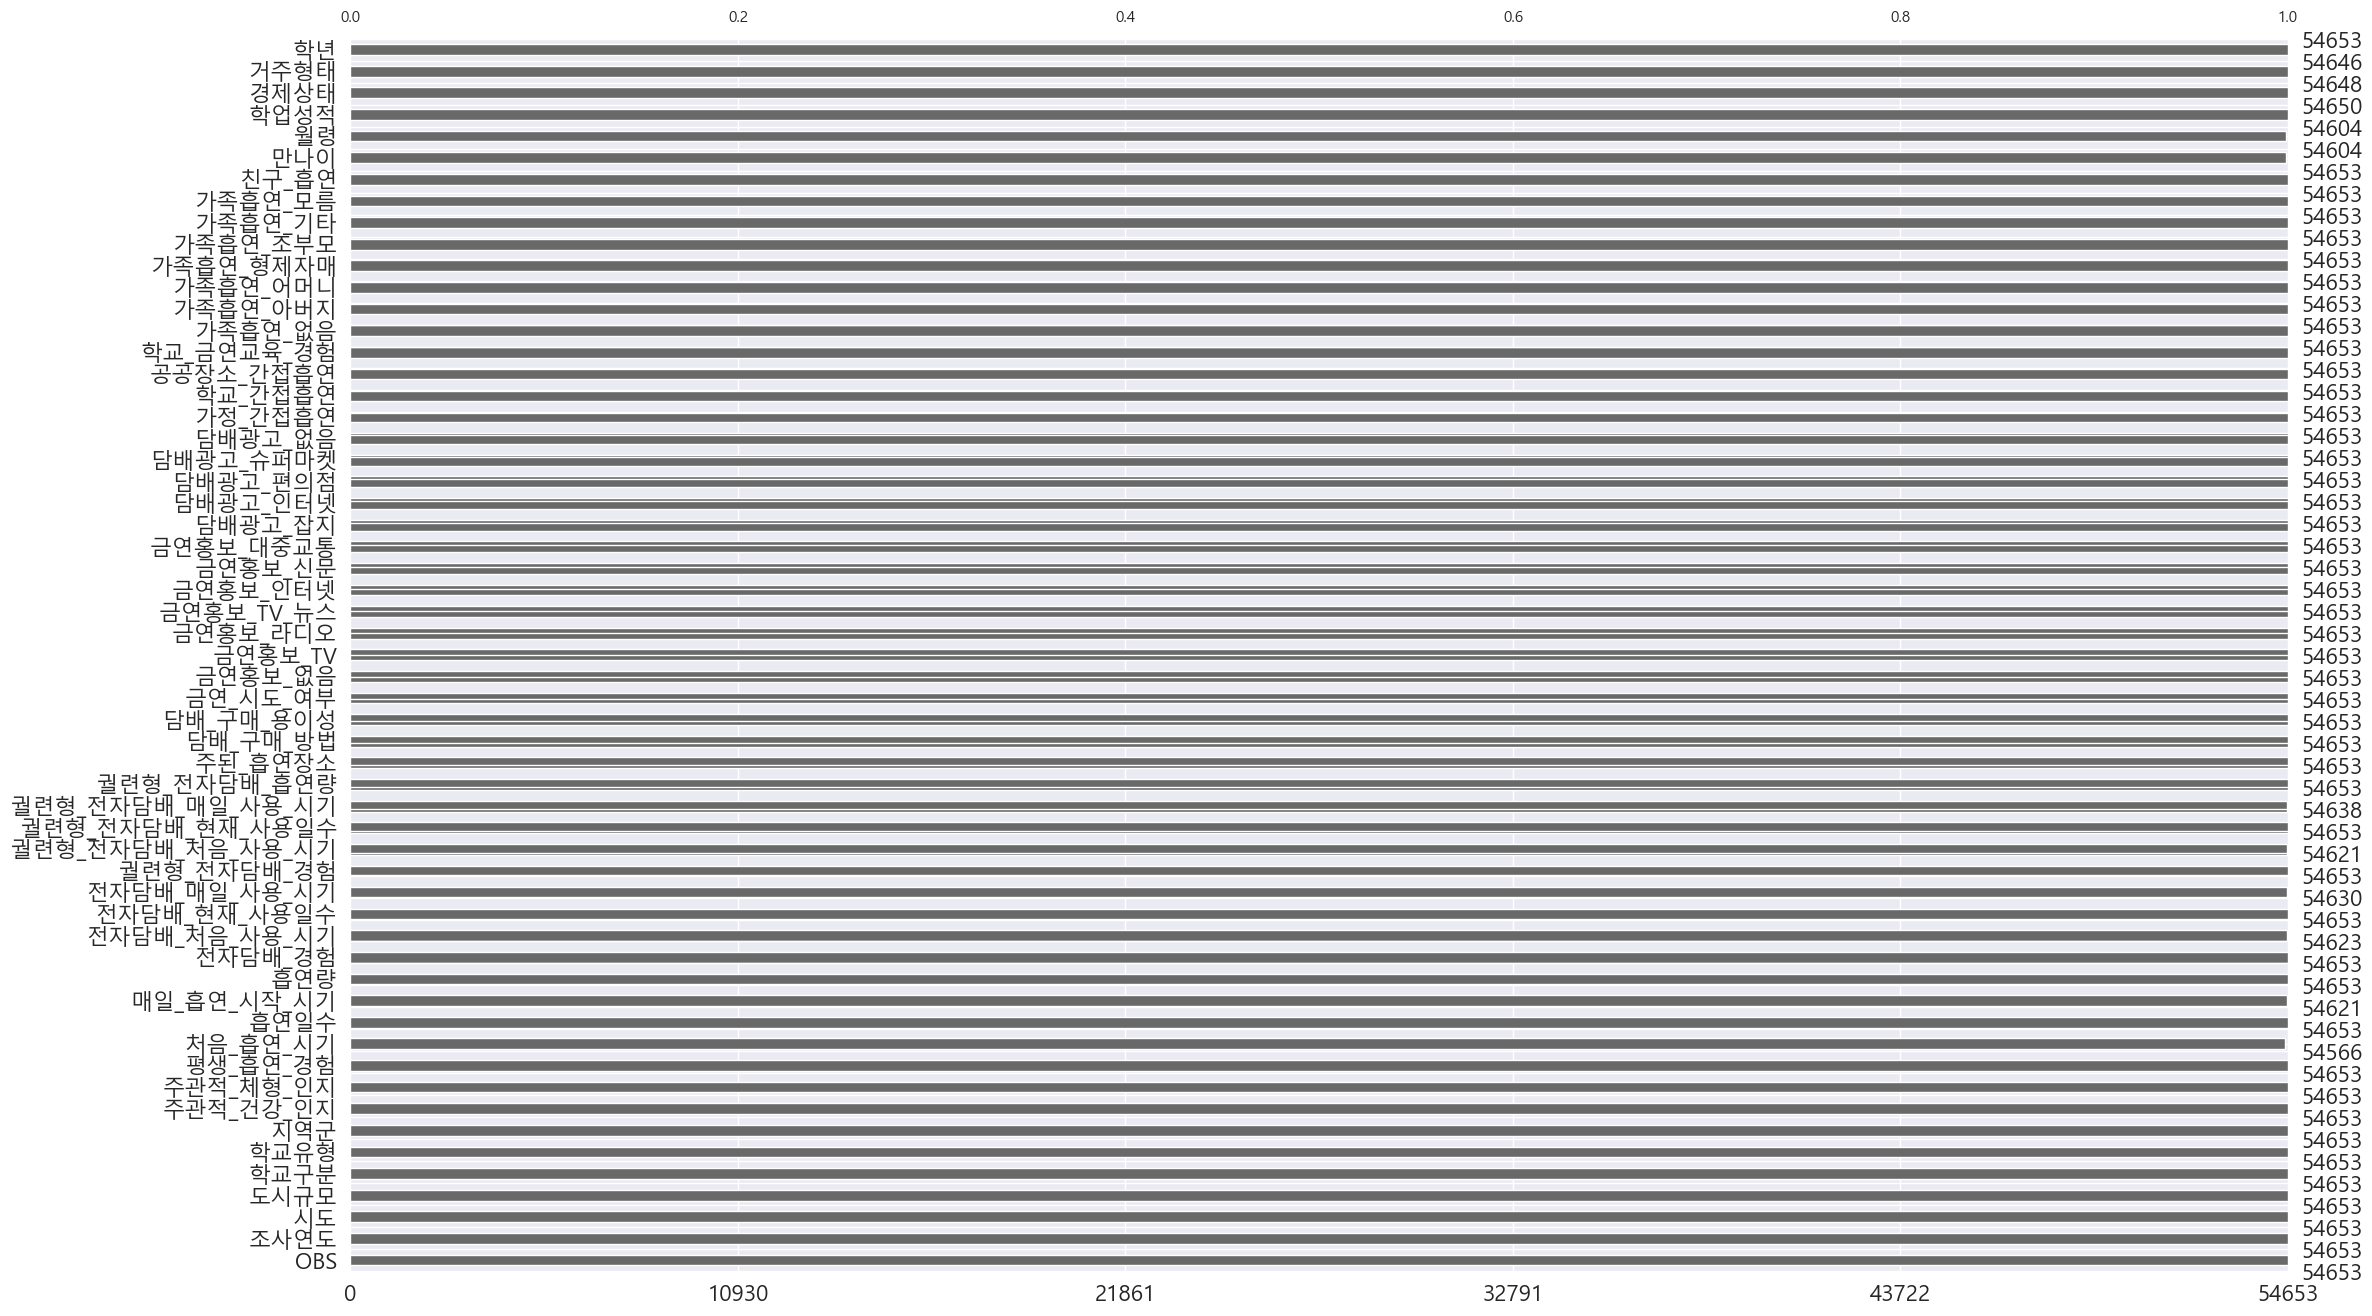

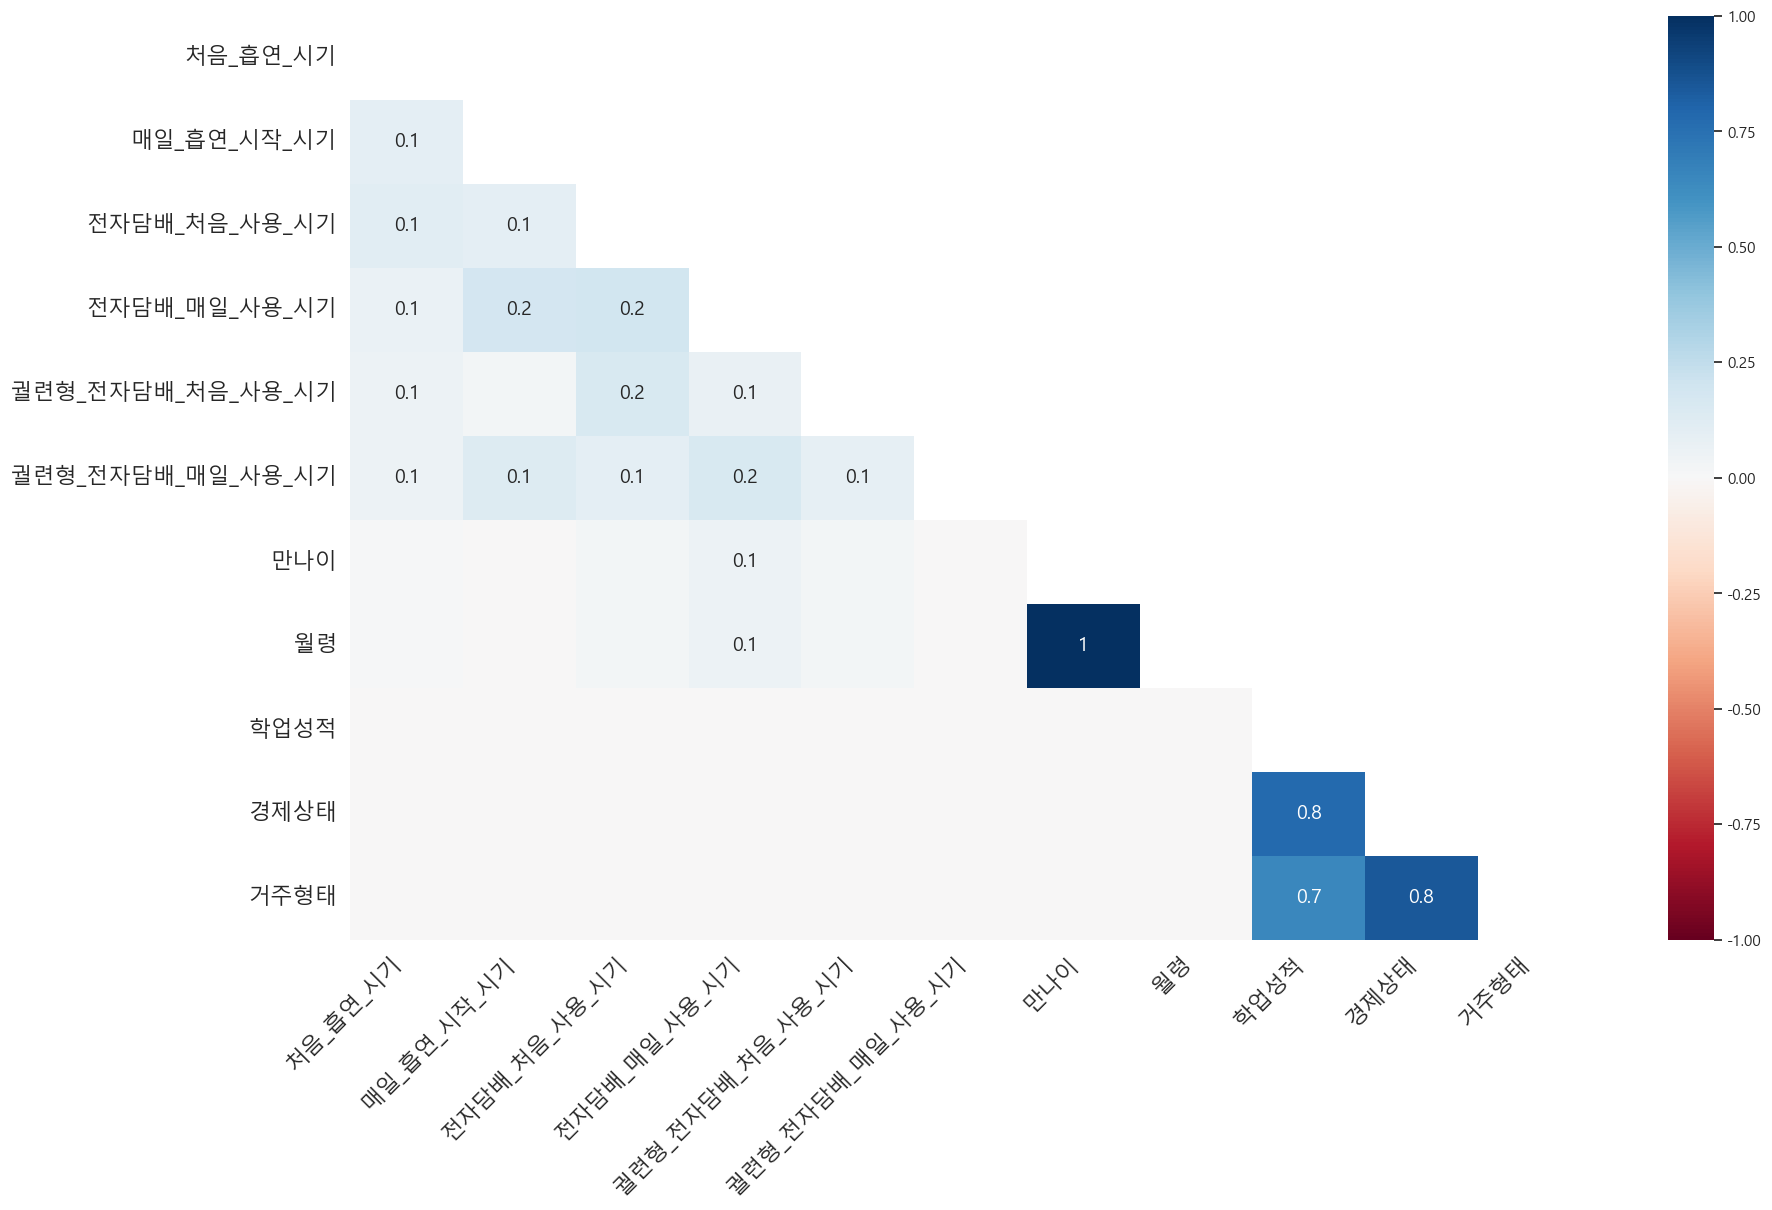

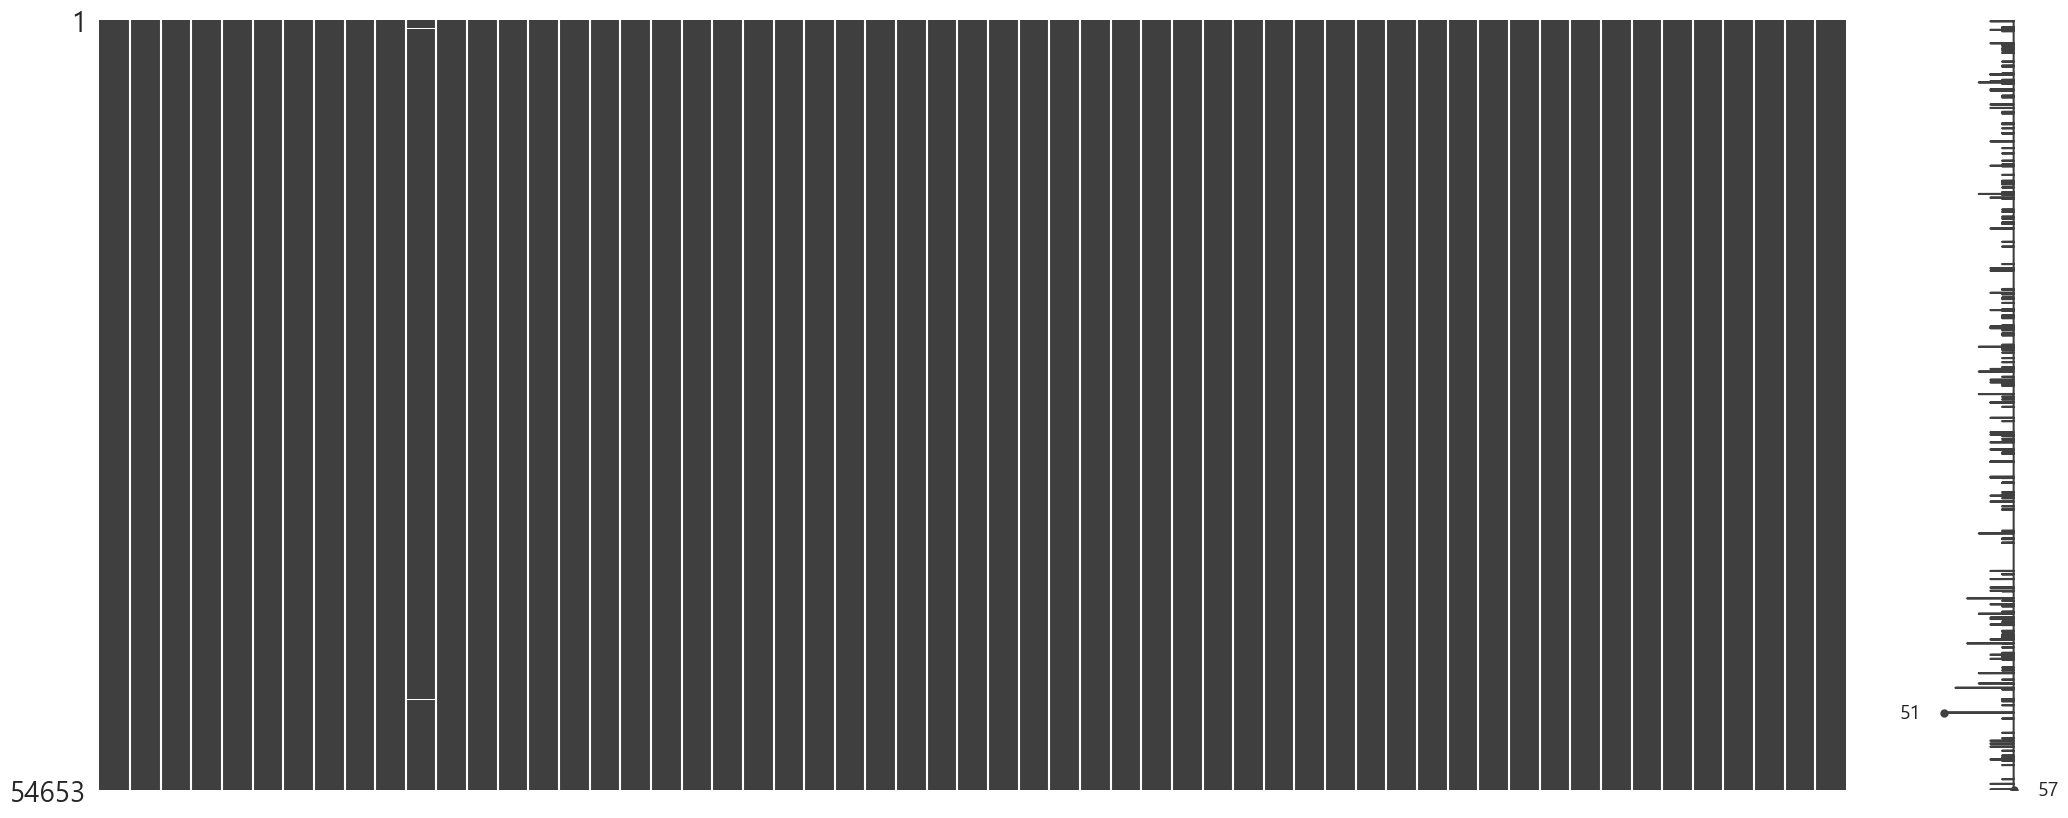

In [5]:
import missingno as msno

# 결측치 막대그래프
msno.bar(df)
plt.show()

# 결측치 히트맵 (상관된 결측치 패턴 확인)
msno.heatmap(df)
plt.show()

# 결측치 매트릭스 (결측 분포 확인)
msno.matrix(df)
plt.show()

In [6]:
# 결측치 있는 컬럼
nan_cols = df.columns[df.isnull().any()]
print(df[nan_cols].isnull().sum())

처음_흡연_시기             87
매일_흡연_시작_시기          32
전자담배_처음_사용_시기        30
전자담배_매일_사용_시기        23
궐련형_전자담배_처음_사용_시기    32
궐련형_전자담배_매일_사용_시기    15
만나이                  49
월령                   49
학업성적                  3
경제상태                  5
거주형태                  7
dtype: int64


In [7]:
# 결측치 있는 컬럼 값 분석
for col in nan_cols:
    print(f"\n[ {col} ]")
    print(df[col].value_counts(dropna=False))


[ 처음_흡연_시기 ]
처음_흡연_시기
9999.0    50442
9.0         960
8.0         945
10.0        629
11.0        500
7.0         368
12.0        207
1.0         171
6.0         122
13.0         91
NaN          87
5.0          64
4.0          41
3.0          17
2.0           9
Name: count, dtype: int64

[ 매일_흡연_시작_시기 ]
매일_흡연_시작_시기
9999.0    53813
9.0         182
11.0        164
10.0        153
8.0         134
12.0         63
1.0          43
7.0          36
NaN          32
13.0         17
6.0           8
5.0           4
2.0           2
4.0           2
Name: count, dtype: int64

[ 전자담배_처음_사용_시기 ]
전자담배_처음_사용_시기
9999.0    51028
9.0         814
10.0        693
8.0         683
11.0        553
12.0        266
7.0         195
13.0        105
1.0          93
6.0          56
4.0          44
3.0          38
NaN          30
5.0          29
2.0          26
Name: count, dtype: int64

[ 전자담배_매일_사용_시기 ]
전자담배_매일_사용_시기
9999.0    54214
11.0         96
10.0         78
9.0          67
12.0         54
8.0          45
1.0 

### 결측치 처리 : 최빈값

In [8]:
nancol = '거주형태'

In [9]:
df[nancol].mode()

0    1.0
Name: 거주형태, dtype: float64

In [10]:
df.fillna(3.0, inplace=True)
with pd.option_context('display.max_rows', None):
    display(df[nancol].value_counts(dropna=False))

거주형태
1.0    51961
4.0     1830
3.0      337
2.0      312
5.0      213
Name: count, dtype: int64

In [11]:
df[nancol].replace(9999.0, 1.0, inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17928\881934370.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[nancol].replace(9999.0, 1.0, inplace=True)


In [12]:
df[nancol].value_counts(dropna=False)

거주형태
1.0    51961
4.0     1830
3.0      337
2.0      312
5.0      213
Name: count, dtype: int64

In [13]:
resumetable(df,5)

데이터셋 크기: (54653, 57)


,피처,데이터 타입,결측값 개수,고유값 개수,1번째 값,2번째 값,3번째 값,4번째 값,5번째 값
0,OBS,object,0,54653,A100001,A100002,A100003,A100004,A100005
1,조사연도,float64,0,1,2024.0,2024.0,2024.0,2024.0,2024.0
2,시도,object,0,17,서울,서울,서울,서울,서울
3,도시규모,object,0,3,대도시,대도시,대도시,대도시,대도시
4,학교구분,object,0,2,중학교,중학교,중학교,중학교,중학교
5,학교유형,object,0,3,남녀공학,남녀공학,남녀공학,남녀공학,남녀공학
6,지역군,object,0,49,서울대4-3,서울대4-3,서울대4-3,서울대4-3,서울대4-3
7,주관적_건강_인지,float64,0,5,1.0,1.0,1.0,4.0,2.0
8,주관적_체형_인지,float64,0,5,2.0,4.0,3.0,4.0,4.0
9,평생_흡연_경험,float64,0,2,1.0,1.0,1.0,1.0,1.0


# 컬럼 하나씩 확인

## 전체 시각화

In [14]:
# 컬럼 시각화 확인용 함수 생성
def visualize_columns(df, target=None):
    for col in df.columns:
        plt.figure(figsize=(8, 4))
        
        if df[col].dtype == 'object' or df[col].nunique() < 15:
            # 범주형 변수
            sns.countplot(data=df, x=col, hue=target if target else None)
            plt.title(f'Count Plot of {col}')
            plt.xticks(rotation=45)
        
        else:
            # 수치형 변수
            sns.histplot(df[col].dropna(), kde=True)
            plt.title(f'Distribution of {col}')
        
        plt.tight_layout()
        plt.show()


In [15]:
df_viz = df.copy()

In [16]:
# 데이터 시각화의 편의성을 위해 9999.0을 nan으로 변경
df_viz.replace(9999.0, np.nan, inplace=True)

In [17]:
resumetable(df_viz,3)

데이터셋 크기: (54653, 57)


,피처,데이터 타입,결측값 개수,고유값 개수,1번째 값,2번째 값,3번째 값
0,OBS,object,0,54653,A100001,A100002,A100003
1,조사연도,float64,0,1,2024.0,2024.0,2024.0
2,시도,object,0,17,서울,서울,서울
3,도시규모,object,0,3,대도시,대도시,대도시
4,학교구분,object,0,2,중학교,중학교,중학교
5,학교유형,object,0,3,남녀공학,남녀공학,남녀공학
6,지역군,object,0,49,서울대4-3,서울대4-3,서울대4-3
7,주관적_건강_인지,float64,0,5,1.0,1.0,1.0
8,주관적_체형_인지,float64,0,5,2.0,4.0,3.0
9,평생_흡연_경험,float64,0,2,1.0,1.0,1.0


In [18]:
exclude_cols = ['OBS', '조사연도']
viz_subset = df_viz.drop(columns=exclude_cols)

In [19]:
# visualize_columns(viz_subset)

## 숫자로 항목화된 컬럼 파악

In [20]:
df2 = df.copy()

In [21]:
# 데이터 시각화의 편의성을 위해 9999.0을 nan으로 변경
df2.replace(9999.0, np.nan, inplace=True)

### 주관적 건강 인지

- 숫자가 작을수록 건강

### 주관적 체형 인지

- 작으면 마름, 크면 살찐 편

## 일반담배

### 평생 흡연 경험

- 1.0 : 없다
- 2.0 : 있다

In [22]:
# 복사본 기준 처리
df2["변환_평생_흡연_경험"] = df2["평생_흡연_경험"] == 2.0

In [23]:
df2['변환_평생_흡연_경험'].value_counts()

변환_평생_흡연_경험
False    50442
True      4211
Name: count, dtype: int64

### 처음 흡연 시기

In [24]:
TC_FAGE = {
    1.0: "초등학교 입학 전",
    2.0: "초등학교 1학년",
    3.0: "초등학교 2학년",
    4.0: "초등학교 3학년",
    5.0: "초등학교 4학년",
    6.0: "초등학교 5학년",
    7.0: "초등학교 6학년",
    8.0: "중학교 1학년",
    9.0: "중학교 2학년",
    10.0: "중학교 3학년",
    11.0: "고등학교 1학년",
    12.0: "고등학교 2학년",
    13.0: "고등학교 3학년"
}

In [25]:
df2["변환_처음_흡연_시기"] = df2["처음_흡연_시기"].map(TC_FAGE)

### 흡연일수

- 흡연일수에서 1을 선택한 이들은 메인 흡연층은 아니라고 봐야 함

### 매일 흡연 시작 시기

- '흡연일수'에서 매일 흡연한다고 응답한 이들만

In [26]:
# 항목이 동일하므로 '처음_흡연_시작_시기'와 똑같이 매핑
df2["변환_매일_흡연_시작_시기"] = df2["매일_흡연_시작_시기"].map(TC_FAGE)

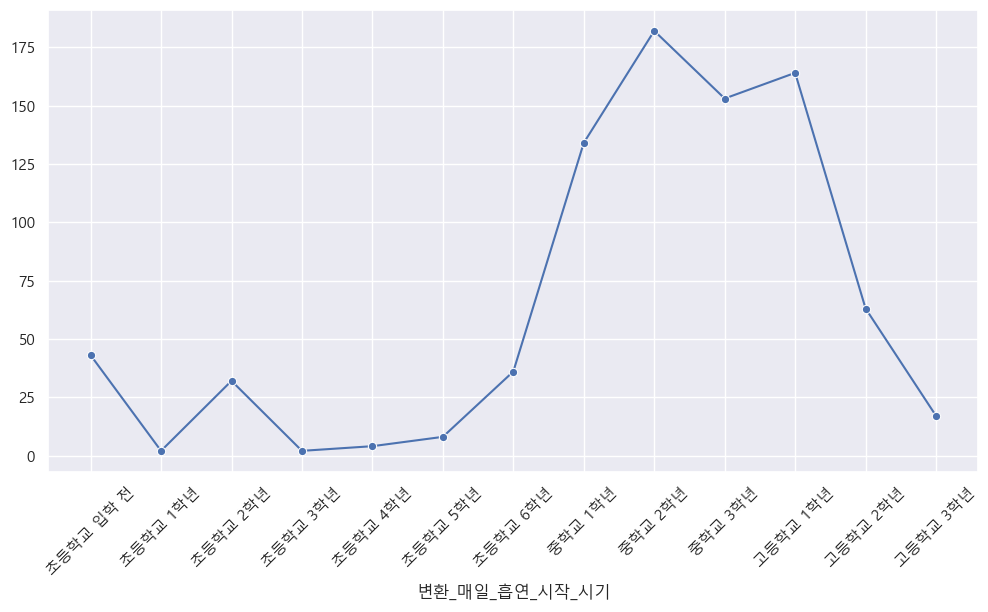

In [27]:
grade_order = [
    '초등학교 입학 전',
    '초등학교 1학년',
    '초등학교 2학년',
    '초등학교 3학년',
    '초등학교 4학년',
    '초등학교 5학년',
    '초등학교 6학년',
    '중학교 1학년',
    '중학교 2학년',
    '중학교 3학년',
    '고등학교 1학년',
    '고등학교 2학년',
    '고등학교 3학년'
]

# sns.countplot(data=df2, x='변환_매일_흡연_시작_시기', order=grade_order)
# plt.xticks(rotation=45);
grade_counts = df2['변환_매일_흡연_시작_시기'].value_counts().reindex(grade_order)
sns.lineplot(x=grade_counts.index, y=grade_counts.values, marker='o')
plt.xticks(rotation=45);

### 흡연량

- 흡연일수에서 최근 30일 동안 피웠다고 대답한 이들만

- 1일수록 적게 피우는 이들

## 전자담배 : 담배와 똑같이 처리

### 전자담배 경험

In [28]:
# boolean으로
df2["변환_전자담배_경험"] = df2["전자담배_경험"] == 2.0

### 전자담배 처음 사용 시기

In [29]:
df2["변환_전자담배_처음_사용_시기"] = df2["전자담배_처음_사용_시기"].map(TC_FAGE)

### 전자담배 매일 사용 시기

In [30]:
# 항목이 동일하므로 '처음_흡연_시작_시기'와 똑같이 매핑
df2["변환_전자담배_매일_사용_시기"] = df2["전자담배_매일_사용_시기"].map(TC_FAGE)

## 궐련형 전자담배 : 담배와 똑같이 처리

### 궐련형_전자담배_경험	

In [31]:
# boolean으로
df2["변환_궐련형_전자담배_경험"] = df2["궐련형_전자담배_경험"] == 2.0

### 궐련형_전자담배_처음_사용_시기

In [32]:
df2["변환_궐련형_전자담배_처음_사용_시기"] = df2["궐련형_전자담배_처음_사용_시기"].map(TC_FAGE)

### 궐련형_전자담배_매일_사용_시기

In [33]:
df2["변환_궐련형_전자담배_매일_사용_시기"] = df2["궐련형_전자담배_매일_사용_시기"].map(TC_FAGE)

## 기타 담배

In [34]:
# 주된_흡연장소
location_mapping = {
    1.0: '집, 친구 집',
    2.0: '학교',
    3.0: '놀이터, 공터, 야산, 공원, 길거리',
    4.0: 'PC방, 비디오방, 노래방',
    5.0: '술집, 나이트클럽, 포장마차'
}

df2['변환_흡연장소'] = df2['주된_흡연장소'].map(location_mapping)

In [35]:
# 담배_구매_방법
TC_GET_M = {
    1.0: '집, 친구 집',
    2.0: '편의점, 가게 구매',
    3.0: '친구, 선후배',
    4.0: '성인으로부터',
    5.0: '주변에서 주워서'
}

df2['변환_담배_구매_방법'] = df2['담배_구매_방법'].map(TC_GET_M)

In [36]:
# 담배_구매_용이성
TC_ACCESS = {
    1.0: '사려던 적 없음',
    2.0: '불가능',
    3.0: '많이 노력',
    4.0: '조금 노력',
    5.0: '쉽게',
}

df2['변환_담배_구매_용이성'] = df2['담배_구매_용이성'].map(TC_ACCESS)

In [37]:
# 담배 구매 용이성에서 '사려던 적 없다' 제외
df2['변환_담배_구매_용이성'].replace('사려던 적 없음', np.nan, inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17928\2462664397.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['변환_담배_구매_용이성'].replace('사려던 적 없음', np.nan, inplace=True)


In [38]:
# 금연_시도_여부
# boolean으로
df2["변환_금연_시도_여부"] = df2["금연_시도_여부"] == 2.0

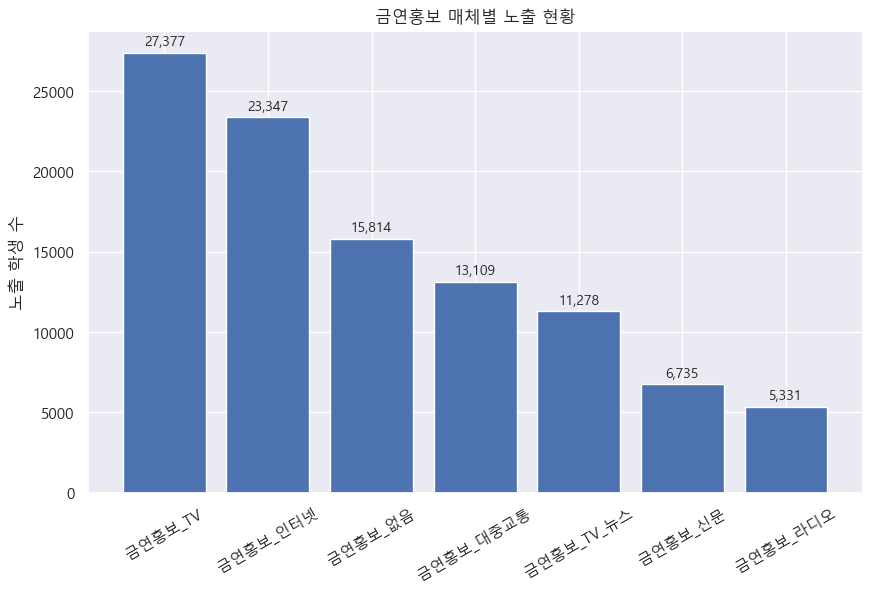

In [39]:
cols = [
    '금연홍보_없음',
    '금연홍보_TV',
    '금연홍보_라디오',
    '금연홍보_TV_뉴스',
    '금연홍보_인터넷',
    '금연홍보_신문',
    '금연홍보_대중교통'
]

# 각 컬럼별로 NaN이 아닌 값의 개수(=노출 학생 수)
counts = [df2[col].notna().sum() for col in cols]

# 컬럼명과 값을 함께 내림차순 정렬
sorted_data = sorted(zip(cols, counts), key=lambda x: x[1], reverse=True)
sorted_cols, sorted_counts = zip(*sorted_data)

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_cols, sorted_counts)
plt.ylabel('노출 학생 수')
plt.title('금연홍보 매체별 노출 현황')
plt.xticks(rotation=30)

# 막대 위에 값 라벨링
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

plt.show()


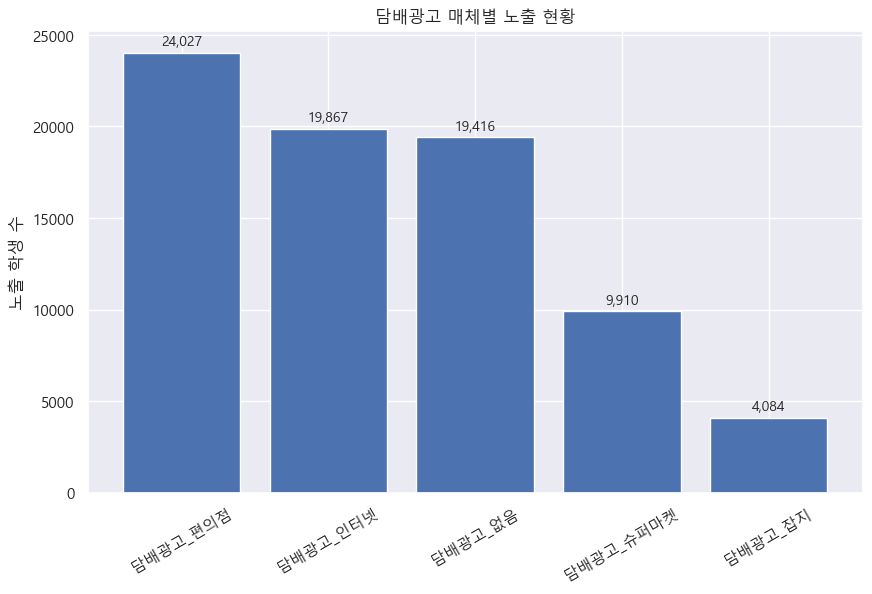

In [40]:
cols = [
    '담배광고_잡지',
    '담배광고_인터넷',
    '담배광고_편의점',
    '담배광고_슈퍼마켓',
    '담배광고_없음',
]

# 각 컬럼별로 NaN이 아닌 값의 개수(=노출 학생 수)
counts = [df2[col].notna().sum() for col in cols]

# 컬럼명과 값을 함께 내림차순 정렬
sorted_data = sorted(zip(cols, counts), key=lambda x: x[1], reverse=True)
sorted_cols, sorted_counts = zip(*sorted_data)

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_cols, sorted_counts)
plt.ylabel('노출 학생 수')
plt.title('담배광고 매체별 노출 현황')
plt.xticks(rotation=30)

# 막대 위에 값 라벨링
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

plt.show()

In [41]:
df2["변환_가정_간접흡연"] = df2["가정_간접흡연"].apply(lambda x: "없음" if x == 1.0 else ("있음" if x in [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0] else np.nan))

In [42]:
df2["변환_학교_간접흡연"] = df2["학교_간접흡연"].apply(lambda x: "없음" if x == 1.0 else ("있음" if x in [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0] else np.nan))

In [43]:
df2["변환_공공장소_간접흡연"] = df2["공공장소_간접흡연"].apply(lambda x: "없음" if x == 1.0 else ("있음" if x in [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0] else np.nan))

In [44]:
# boolean으로
df2["변환_학교_금연교육_경험"] = df2["학교_금연교육_경험"] == 2.0

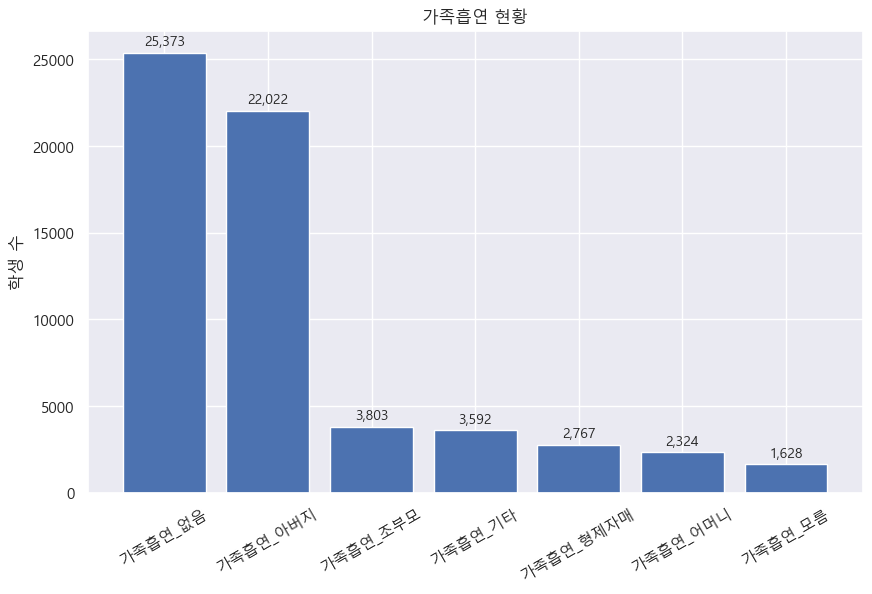

In [45]:
cols = [
    '가족흡연_없음',
    '가족흡연_아버지',
    '가족흡연_어머니',
    '가족흡연_형제자매',
    '가족흡연_조부모',
    '가족흡연_기타',
    '가족흡연_모름',
]

# 각 컬럼별로 NaN이 아닌 값의 개수(=노출 학생 수)
counts = [df2[col].notna().sum() for col in cols]

# 컬럼명과 값을 함께 내림차순 정렬
sorted_data = sorted(zip(cols, counts), key=lambda x: x[1], reverse=True)
sorted_cols, sorted_counts = zip(*sorted_data)

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_cols, sorted_counts)
plt.ylabel('학생 수')
plt.title('가족흡연 현황')
plt.xticks(rotation=30)

# 막대 위에 값 라벨링
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

plt.show()

In [46]:
df2["변환_가족흡연"] = df2["공공장소_간접흡연"].apply(lambda x: "없음" if x == 1.0 else ("있음" if x in [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0] else np.nan))

In [47]:
def 가족흡연_변환(row):
    if row["가족흡연_없음"] == 1.0:
        return "없음"
    elif row["가족흡연_모름"] == 7.0:
        return "모름"
    elif any(row[col] in [2.0, 3.0, 4.0, 5.0, 6.0] for col in ["가족흡연_아버지", "가족흡연_어머니", "가족흡연_형제자매", "가족흡연_조부모", "가족흡연_기타"]):
        return "있음"
    else:
        return np.nan

df2["가족흡연"] = df2.apply(가족흡연_변환, axis=1)

In [48]:
# 친구_흡연
TC_CSBF = {
    1.0: '없음',
    2.0: '몇 명',
    3.0: '대부분',
    4.0: '모두',
}

df2['변환_친구_흡연'] = df2['친구_흡연'].map(TC_CSBF)

In [49]:
df2["만나이"] = df2["만나이"].replace(3.0, 13.0)

In [50]:
# 학업성적
E_S_RCRD = {
    1.0: '상',
    2.0: '중상',
    3.0: '중',
    4.0: '중하',
    5.0: '하',
}

df2['변환_학업성적'] = df2['학업성적'].map(E_S_RCRD)

In [51]:
# 학년
GRADE = {
    1.0: '중학교 1학년',
    2.0: '중학교 2학년',
    3.0: '중학교 3학년',
    4.0: '고등학교 1학년',
    5.0: '고등학교 2학년',
    6.0: '고등학교 3학년',
}

df2['변환학년'] = df2['학년'].map(GRADE)

In [52]:
df2 = df2.rename(columns={"변환학년": "변환_학년"})

### 확인용

In [53]:
vizcol = '변환_학년'
df2[vizcol].value_counts(dropna=False, normalize=False)

변환_학년
중학교 1학년     9887
중학교 2학년     9725
중학교 3학년     9475
고등학교 1학년    8972
고등학교 2학년    8719
고등학교 3학년    7875
Name: count, dtype: int64

In [54]:
with pd.option_context('display.max_rows', None):
    display(resumetable(df2, 3))

데이터셋 크기: (54653, 79)


,피처,데이터 타입,결측값 개수,고유값 개수,1번째 값,2번째 값,3번째 값
0,OBS,object,0,54653,A100001,A100002,A100003
1,조사연도,float64,0,1,2024.0,2024.0,2024.0
2,시도,object,0,17,서울,서울,서울
3,도시규모,object,0,3,대도시,대도시,대도시
4,학교구분,object,0,2,중학교,중학교,중학교
5,학교유형,object,0,3,남녀공학,남녀공학,남녀공학
6,지역군,object,0,49,서울대4-3,서울대4-3,서울대4-3
7,주관적_건강_인지,float64,0,5,1.0,1.0,1.0
8,주관적_체형_인지,float64,0,5,2.0,4.0,3.0
9,평생_흡연_경험,float64,0,2,1.0,1.0,1.0


In [55]:
df2.to_csv('02_데이터셋/청소년건강행태조사/결측치처리_변환추가.csv', index=False, encoding='utf-8-sig')